# INITIALIZE

In [1]:
%config InlineBackend.figure_format = 'svg'
from IPython.display import HTML, Image
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
import mpl_toolkits.mplot3d.axes3d as p3
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from qiskit.quantum_info.operators.pauli import Pauli

rc('animation', html='html5') # equivalent to rcParams['animation.html'] = 'html5'. This is to display html5 video

                              # In the animation.save command, the param codec is the video codec to be used. 
                              # Not all codecs are supported by a given MovieWriter. 
                              # If None, default to rcParams['animation.codec']

# CREATE SPHERE

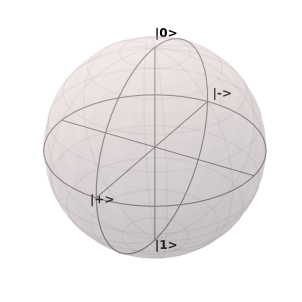

In [2]:
# Visual params
sphere_color = '#FFDDDD'           # Color of Bloch sphere, default = #FFDDDD'  
sphere_alpha = 0.2                 # Transparency of Bloch sphere, default = 0.2
frame_color = 'gray'               # Color of wireframe, default = 'gray'
frame_width = 1                    # Width of wireframe, default = 1
frame_alpha = 0.1                  # Transparency of wireframe, default = 0.2

# 3D plot
fig = plt.figure(figsize=(4,4))
ax = p3.Axes3D(fig)


ax.set_xlim3d([-0.7, 0.7])
#ax.set_xlabel('X')
ax.set_ylim3d([-0.7, 0.7])
#ax.set_ylabel('Y')
ax.set_zlim3d([-0.7, 0.7])
#ax.set_zlabel('Z')
#ax.set_title('Bloch Sphere')
ax.set_axis_off()

ax.text(0,0,1.1,"|0>", weight = 'bold', fontsize=12)
ax.text(0,0,-1.1,"|1>", weight = 'bold', fontsize=12)
ax.text(1.1,0,0,"|+>", weight = 'bold', fontsize=12)
ax.text(-1.1,0,0,"|->", weight = 'bold', fontsize=12)

# Sphere
u = np.linspace(0,2*np.pi, 51)
v = np.linspace(0, np.pi,51)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x_sphere,y_sphere,z_sphere, rstride=2, cstride=2, 
                color=sphere_color, linewidth=0, alpha=sphere_alpha)

# Wireframe                
ax.plot_wireframe(x_sphere, y_sphere, z_sphere, rstride=5, cstride=5,
                  color=frame_color, alpha=frame_alpha)
           

# Equator
ax.plot(1.0 * np.cos(u), 1.0 * np.sin(u), zs=0, zdir='z',
          lw=frame_width, color=frame_color)
ax.plot(1.0 * np.cos(u), 1.0 * np.sin(u), zs=0, zdir='y',
          lw=frame_width, color=frame_color)   
      
# Axes
span = np.linspace(-1.0, 1.0, 2)
ax.plot(span, 0 * span, zs=0, zdir='z', label='X',
                lw=frame_width, color=frame_color)
ax.plot(0 * span, span, zs=0, zdir='z', label='Y',
                lw=frame_width, color=frame_color)
ax.plot(0 * span, span, zs=0, zdir='y', label='Z',
                lw=frame_width, color=frame_color)

ax.view_init(azim=30, elev=30)

# INIT VECTOR

In [3]:
# Visual params
vector_color = '#D4578D'
vector_width = 4
vector_head = 10

# Vector init
line, = ax.plot([], [], [], lw=vector_width, c = vector_color)
dot, = ax.plot([], [], [], lw=vector_width, c = vector_color, marker = 'o', markersize = vector_head,
               markerfacecolor=vector_color, markeredgecolor = vector_color)

# Pauli matrices (will be used to extract Bloch vector components)
X_mat = Pauli.pauli_single(1,0,'X').to_matrix()
Y_mat = Pauli.pauli_single(1,0,'Y').to_matrix()
Z_mat = Pauli.pauli_single(1,0,'Z').to_matrix()

# BB1 ANIMATION CODE

In [4]:
# This animation is for BB1 gate with theta = pi

theta = np.pi

final_pause = 0.2
frames_vector = np.arange(0,1 + final_pause,0.01)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    dot.set_data([], [])
    dot.set_3d_properties([])
    return line, dot,

# animation function: This is called sequentially
def animate(i):
            
    # set initial state of qubit
    qc_init = QuantumCircuit(1)
    qc_init.id(0)
    
    # Short pause
    if i < 0.05:
        rho_mat = qi.DensityMatrix.from_instruction(qc_init).data
    
    # Rotate about x (Does this for the first quarter of the animation length)
    elif i >= 0.05 and i < 0.25:
        qc = QuantumCircuit(1)
        qc = qc_init + qc
        qc.rx(1/(0.25 - 0.05)*theta*(i - 0.05),0)
        rho_mat = qi.DensityMatrix.from_instruction(qc).data

    # Short pause
    elif i >= 0.25 and i < (0.25 + 0.05):
        qc = QuantumCircuit(1)
        qc = qc_init + qc
        qc.rx(theta,0)
        rho_mat = qi.DensityMatrix.from_instruction(qc).data
        
    # Rotate by pi about (cos(phi),sin(phi),0)-axis (Does this for the second quarter of the animation length)
    elif i >= (0.25 + 0.05) and i < 0.5:
        qc = QuantumCircuit(1)
        qc = qc_init + qc
        qc.rx(theta,0)

        qc.u3(1/(0.25 - 0.05)*np.pi*(i - (0.25 + 0.05)), 
              np.arccos(-1/(0.25 - 0.05)*theta*(i - (0.25 + 0.05))/(4*np.pi)) - np.pi/2, 
              - np.arccos(-1/(0.25 - 0.05)*theta*(i - (0.25 + 0.05))/(4*np.pi)) + np.pi/2,0)
        rho_mat = qi.DensityMatrix.from_instruction(qc).data

    # Short pause
    elif i >= 0.5 and i < (0.5 + 0.05):
        qc = QuantumCircuit(1)
        qc = qc_init + qc
        qc.rx(theta,0)
        qc.u3(np.pi, np.arccos(-theta/(4*np.pi)) - np.pi/2, 
              - np.arccos(-theta/(4*np.pi)) + np.pi/2,0)
        rho_mat = qi.DensityMatrix.from_instruction(qc).data
        
    # Rotate by 2*pi about (cos(3phi),sin(3phi),0)-axis (Does this for the third quarter of the animation length)
    elif i >= (0.5 + 0.05) and i < 0.75:
        qc = QuantumCircuit(1)
        qc = qc_init + qc
        qc.rx(theta,0)
        qc.u3(np.pi, np.arccos(-theta/(4*np.pi)) - np.pi/2, 
              -np.arccos(-theta/(4*np.pi)) + np.pi/2,0)
        
        qc.u3(1/(0.25 - 0.05)*2*np.pi*(i - (0.5 + 0.05)), 
              3*np.arccos(-1/(0.25 - 0.05)*theta*(i - (0.5 + 0.05))/(4*np.pi)) - np.pi/2, 
              -3*np.arccos(-1/(0.25 - 0.05)*theta*(i - (0.5 + 0.05))/(4*np.pi)) + np.pi/2,0)
        rho_mat = qi.DensityMatrix.from_instruction(qc).data
                                   
   # Short pause
    elif i >= 0.75 and i < (0.75 + 0.05):
        qc = QuantumCircuit(1)
        qc = qc_init + qc
        qc.rx(theta,0)
        qc.u3(np.pi, np.arccos(-theta/(4*np.pi)) - np.pi/2, 
              -np.arccos(-theta/(4*np.pi)) + np.pi/2,0)      
        qc.u3(2*np.pi, 3*np.arccos(-theta/(4*np.pi)) - np.pi/2, 
              -3*np.arccos(-theta/(4*np.pi)) + np.pi/2,0)                         
        rho_mat = qi.DensityMatrix.from_instruction(qc).data

    # Rotate by pi about (cos(phi),sin(phi),0)-axis (Does this for the second quarter of the animation length)
    elif i >= (0.75 + 0.05) and i < 1:
        qc = QuantumCircuit(1)
        qc = qc_init + qc
        qc.rx(theta,0)
        qc.u3(np.pi, np.arccos(-theta/(4*np.pi)) - np.pi/2, 
              -np.arccos(-theta/(4*np.pi)) + np.pi/2,0)      
        qc.u3(2*np.pi, 3*np.arccos(-theta/(4*np.pi)) - np.pi/2, 
              -3*np.arccos(-theta/(4*np.pi)) + np.pi/2,0) 
        
        qc.u3(-1/(0.25 - 0.05)*np.pi*(i - (0.75 + 0.05)), 
              np.arccos(-1/(0.25 - 0.05)*theta*(i - (0.75 + 0.05))/(4*np.pi)) - np.pi/2, 
              -np.arccos(-1/(0.25 - 0.05)*theta*(i - (0.75 + 0.05))/(4*np.pi)) + np.pi/2,0)        
        rho_mat = qi.DensityMatrix.from_instruction(qc).data
        
    else:
        qc = QuantumCircuit(1)
        qc = qc_init + qc
        qc.rx(theta,0)
        qc.u3(np.pi, np.arccos(-theta/(4*np.pi)) - np.pi/2, 
              -np.arccos(-theta/(4*np.pi)) + np.pi/2,0)      
        qc.u3(2*np.pi, 3*np.arccos(-theta/(4*np.pi)) - np.pi/2, 
              -3*np.arccos(-theta/(4*np.pi)) + np.pi/2,0) 
        qc.u3(np.pi, np.arccos(-theta/(4*np.pi)) - np.pi/2, 
              -np.arccos(-theta/(4*np.pi)) + np.pi/2,0)      
        rho_mat = qi.DensityMatrix.from_instruction(qc).data
    
    x_vect = np.real(np.trace(np.dot(X_mat,rho_mat)))
    y_vect = np.real(np.trace(np.dot(Y_mat,rho_mat)))
    z_vect = np.real(np.trace(np.dot(Z_mat,rho_mat)))
    
    line.set_data([0,x_vect], [0,y_vect])
    line.set_3d_properties([0,z_vect])
    dot.set_data([x_vect], [y_vect])
    dot.set_3d_properties([z_vect])

    return line, dot,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames_vector, interval=20, blit=False)

In [5]:
#anim

In [6]:
anim.save('animation.gif', writer='imagemagick', fps=10)
#anim.save('animation.mp4', writer='ffmpeg', fps=10)
Image(url='animation.gif')